# Horizon Funding Data

## Load packages & Data sets

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer

import pickle


import plotly.express as px

### Project Data:

In [2]:
project = pd.read_csv("../data_1/raw/project.csv")

# Overview
print(project.shape)
project.head()

(15341, 20)


,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,101116741,DOE,SIGNED,Digitizing Other Economies: A Comparative Appr...,2024-02-01,2029-01-31,1499998,1499998,HORIZON.1.1,ERC-2023-STG,2023-12-15,HORIZON,ERC-2023-STG,ERC-2023-STG,HORIZON-ERC,NaN,"How do longstanding, primarily non-industrial,...",2023-12-26 14:40:12,259247,10.3030/101116741
1,101163161,IRASTRO,SIGNED,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,2025-08-01,2031-07-31,12085363,12085363,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The James Webb Space Telescope (JWST) has ushe...,2025-02-24 17:23:14,268970,10.3030/101163161
2,101160499,In-phase,SIGNED,Multiscale modelling of aberrant phase transit...,2025-06-01,2030-05-31,1489128,1489128,HORIZON.1.1,ERC-2024-STG,2025-02-19,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,The spatiotemporal organization of the cell ma...,2025-02-24 17:23:11,268969,10.3030/101160499
3,101166905,mw-atlas,SIGNED,The first comprehensive Atlas of the Milky Way,2025-05-01,2031-04-30,9957560,9957560,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The Milky Way is the cosmic environment in whi...,2025-02-24 17:23:01,268971,10.3030/101166905
4,101162875,MAtCHLESS,SIGNED,Untapping multiparametric 2D luminescence sens...,2025-03-01,2030-02-28,1500000,1500000,HORIZON.1.1,ERC-2024-STG,2025-02-18,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,Cellular organisms are complex machines whose ...,2025-02-24 17:23:12,268966,10.3030/101162875


### Organisation Data:

In [3]:
org = pd.read_csv("../data_1/raw/organization.csv")

# Overview
print(org.shape)
org.head()

(100249, 25)


,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
0,101116741,DOE,999981634,NL811383696B01,WAGENINGEN UNIVERSITY,WU,False,HES,DROEVENDAALSESTEEG 4,6708 PB,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-12-26 14:40:12,1906458,1,coordinator,1499998.0,1499998.0,1499998,False,NaN
1,101163161,IRASTRO,999997736,DK31119103,AARHUS UNIVERSITET,AU,False,HES,NORDRE RINGGADE 1,8000,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1905956,2,participant,4246240.0,4246240.0,4246240,False,NaN
2,101163161,IRASTRO,999854855,DE138408327,UNIVERSITAET POTSDAM,UP,False,HES,AM NEUEN PALAIS 10,14469,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1908936,3,participant,1982813.0,1982813.0,1982813,False,NaN
3,101163161,IRASTRO,999990267,DE129517720,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,MPG,False,REC,HOFGARTENSTRASSE 8,80539,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1949732,1,coordinator,5856310.0,5856310.0,5856310,False,NaN
4,101160499,In-phase,999874546,ESQ2818014I,UNIVERSIDAD COMPLUTENSE DE MADRID,UCM,False,HES,AVENIDA DE SENECA 2,28040,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:11,1906229,1,coordinator,1489128.0,1489128.0,1489128,False,NaN


### euroSciVoc Data

In [4]:
scivoc = pd.read_csv("../data_1/raw/euroSciVoc.csv")

# Overview
print(scivoc.shape)
scivoc.head()

(38789, 5)


,projectID,euroSciVocCode,euroSciVocPath,euroSciVocTitle,euroSciVocDescription
0,101116741,/29/97/543,/social sciences/political sciences/government...,government systems,NaN
1,101163161,/27/81/30021/30833628,"/agricultural sciences/agriculture, forestry, ...",grains and oilseeds,NaN
2,101163161,/23/43/251/48354418,/natural sciences/physical sciences/optics/mic...,microscopy,NaN
3,101163161,/23/43/257/761,/natural sciences/physical sciences/astronomy/...,astrochemistry,NaN
4,101163161,/29/89,/social sciences/law,law,NaN


### Topics

In [53]:
topics = pd.read_csv("../data_1/raw/topics.csv")

# Overview
print(topics.shape)
topics.head()

(15341, 3)


,projectID,topic,title
0,101116741,ERC-2023-STG,ERC STARTING GRANTS
1,101163161,ERC-2024-SyG,ERC SYNERGY GRANTS
2,101160499,ERC-2024-STG,ERC STARTING GRANTS
3,101166905,ERC-2024-SyG,ERC SYNERGY GRANTS
4,101162875,ERC-2024-STG,ERC STARTING GRANTS


### Legal Basis

In [52]:
legal = pd.read_csv("../data_1/raw/legalBasis.csv")

# Overview
print(legal.shape)
legal.head()

(20512, 4)


,projectID,legalBasis,title,uniqueProgrammePart
0,101116741,HORIZON.1.1,European Research Council (ERC),True
1,101163161,HORIZON.1.1,European Research Council (ERC),True
2,101160499,HORIZON.1.1,European Research Council (ERC),True
3,101166905,HORIZON.1.1,European Research Council (ERC),True
4,101162875,HORIZON.1.1,European Research Council (ERC),True


### Programmes

In [155]:
programme = pd.read_csv("../data_1/raw/programme.csv")

# Overview
print(programme.shape)
programme.head()

(2635, 15)


,id,language,code,startDate,endDate,title,shortTitle,objective,keywords,frameworkProgramme,parentProgramme,legalBasis,call,contentUpdateDate,rcn
0,HORIZON_HORIZON-CL4-2023-SPACE-01-71,en,HORIZON-CL4-2023-SPACE-01-71,NaN,NaN,Scientific exploitation of space data,NaN,<p>Exploitation of all acquired and available ...,Space;Space and International cooperation;Math...,HORIZON,HORIZON-Topics,HORIZON.2.4.10,HORIZON-CL4-2023-SPACE-01,2022-11-11 15:28:01,707397
1,HORIZON_HORIZON-MISS-2023-OCEAN-01-08,en,HORIZON-MISS-2023-OCEAN-01-08,NaN,NaN,Integration of socio-ecological models into th...,NaN,<p>The vision for the European Digital Twin Oc...,Ocean Observation and Monitoring;European Mari...,HORIZON,HORIZON-Topics,HORIZON.2.2;HORIZON.2.4;HORIZON.2.5;HORIZON.2.6,HORIZON-MISS-2023-OCEAN-01,2022-12-29 15:29:12,708163
2,HORIZON_HORIZON-MSCA-2022-DN-01-01,en,HORIZON-MSCA-2022-DN-01-01,NaN,NaN,MSCA Doctoral Networks 2022,NaN,<p>MSCA Doctoral Networks will implement docto...,NaN,HORIZON,HORIZON-Topics,HORIZON.1.2,HORIZON-MSCA-2022-DN-01,2022-06-20 10:11:55,706020
3,HORIZON_HORIZON-CL4-2023-DATA-01-06,en,HORIZON-CL4-2023-DATA-01-06,NaN,NaN,Coordination and Support of Cognitive Computin...,NaN,"<ul level=""""0""""><li>To support the European Co...",Computer hardware and architecture;Computer sc...,HORIZON,HORIZON-Topics,HORIZON.2.4.7,HORIZON-CL4-2023-DATA-01,2022-11-08 17:40:51,707375
4,HORIZON_HORIZON-CL6-2021-COMMUNITIES-01-02,en,HORIZON-CL6-2021-COMMUNITIES-01-02,NaN,NaN,Expertise and training centre on rural innovation,NaN,<p><span>Proposals should provide capacity bui...,Innovation systems;Participatory Innovation;We...,HORIZON,HORIZON-Topics,HORIZON.2.6.3,HORIZON-CL6-2021-COMMUNITIES-01,2022-06-20 10:30:37,706042


## Cleaning/Preproccessing Data

### Project Data

##### Examine Data Types & missingness

In [86]:
print(project.shape)
print(project.dtypes)

(15341, 21)
projectID                      int64
acronym                       object
status                      category
title                 string[python]
startDate             datetime64[ns]
endDate               datetime64[ns]
totalCost                    float64
ecMaxContribution            float64
legalBasis                  category
topics                      category
ecSignatureDate       datetime64[ns]
frameworkProgramme          category
masterCall                  category
subCall                     category
fundingScheme               category
nature                       float64
objective             string[python]
contentUpdateDate     datetime64[ns]
rcn                            int64
grantDoi                      object
similarity                   float32
dtype: object


In [7]:
project.isnull().sum().sort_values(ascending=False)


nature                15341
grantDoi                 60
fundingScheme             1
ecSignatureDate           1
startDate                 0
endDate                   0
totalCost                 0
ecMaxContribution         0
legalBasis                0
topics                    0
acronym                   0
frameworkProgramme        0
masterCall                0
subCall                   0
title                     0
status                    0
objective                 0
contentUpdateDate         0
rcn                       0
id                        0
dtype: int64

#### Converting data types

##### Dates

In [8]:
project["startDate"] = pd.to_datetime(project["startDate"], errors="coerce")
project["endDate"] = pd.to_datetime(project["endDate"], errors="coerce")
project["ecSignatureDate"] = pd.to_datetime(project["ecSignatureDate"], errors="coerce")
project["contentUpdateDate"] = pd.to_datetime(project["contentUpdateDate"], errors="coerce")


print(project[["startDate", "endDate","ecSignatureDate","contentUpdateDate"]].dtypes)
print(project[["startDate", "endDate","ecSignatureDate","contentUpdateDate"]].isnull().sum())


startDate            datetime64[ns]
endDate              datetime64[ns]
ecSignatureDate      datetime64[ns]
contentUpdateDate    datetime64[ns]
dtype: object
startDate            0
endDate              0
ecSignatureDate      1
contentUpdateDate    0
dtype: int64


All dates have been converted, however there is one missing ecSignatureDate which can be imputed later.

In [9]:
project[project["ecSignatureDate"].isna()]

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
13030,101183158,AgRibot,SIGNED,"Harnessing Robotics, XR/AR, and 5G for a New E...",2024-11-01,2028-10-31,4966380,4966380,HORIZON.2.6,HORIZON-CL6-2024-GOVERNANCE-01-7,NaT,HORIZON,HORIZON-CL6-2024-GOVERNANCE-01,HORIZON-CL6-2024-GOVERNANCE-01,HORIZON-RIA,NaN,AgRibot is a groundbreaking project aimed at a...,2024-11-01 17:52:05,267095,10.3030/101183158


##### Money

In [10]:
# ensure strings, remove commas as decimals and convert to numbers
project["totalCost"] = project["totalCost"].astype(str)
project["ecMaxContribution"] = project["ecMaxContribution"].astype(str)

project["totalCost"] = project["totalCost"].str.replace(",", ".")              
project["ecMaxContribution"] = project["ecMaxContribution"].str.replace(",", ".")              

project["totalCost"] = pd.to_numeric(project["totalCost"], errors="coerce")
project["ecMaxContribution"] = pd.to_numeric(project["ecMaxContribution"], errors="coerce")

#check
print(project["totalCost"].isna().sum())      
print(project["ecMaxContribution"].isna().sum())      

0
0


##### Strings

In [11]:
text_cols = ["title","objective"]
project[text_cols] = project[text_cols].astype("string")


##### Categories

In [12]:
cat_cols = ["status","legalBasis","topics", "frameworkProgramme", "fundingScheme", "masterCall", "subCall"]
project[cat_cols] = project[cat_cols].astype("category")


### Org Data

#### Examine Data Types & missingness

In [13]:
print(org.shape)
print(org.dtypes)

(100249, 25)
projectID               int64
projectAcronym         object
organisationID          int64
vatNumber              object
name                   object
shortName              object
SME                    object
activityType           object
street                 object
postCode               object
city                   object
country                object
nutsCode               object
geolocation            object
organizationURL        object
contactForm            object
contentUpdateDate      object
rcn                     int64
order                   int64
role                   object
ecContribution        float64
netEcContribution     float64
totalCost              object
endOfParticipation       bool
active                float64
dtype: object


In [14]:
missing_summary = org.isnull().sum().sort_values(ascending=False)
print(missing_summary)

active                100249
organizationURL        38954
shortName              25507
ecContribution         15704
vatNumber              15403
totalCost                936
postCode                 786
geolocation              588
street                   300
nutsCode                 278
city                     263
SME                      263
netEcContribution         42
activityType              24
country                   13
projectAcronym             0
contactForm                0
contentUpdateDate          0
rcn                        0
order                      0
role                       0
name                       0
organisationID             0
endOfParticipation         0
projectID                  0
dtype: int64


#### Dates

In [15]:
org["contentUpdateDate"] = pd.to_datetime(org["contentUpdateDate"], errors="coerce")

print(project["contentUpdateDate"].dtypes)
print(project["contentUpdateDate"].isnull().sum())


datetime64[ns]
0


#### Money

In [16]:
# ensure strings, remove commas as decimals and convert to numbers (replace blanmks with 0)
org["totalCost"] = org["totalCost"].fillna("0") 

org["totalCost"] = org["totalCost"].astype(str)

org["totalCost"] = org["totalCost"].str.replace(",", ".")              

org["totalCost"] = pd.to_numeric(org["totalCost"], errors="coerce")

#check
print(org["totalCost"].isna().sum())      


0


#### Categories

In [17]:
org["SME"] = org["SME"].astype("category")
org["role"] = org["role"].astype("category")
org["country"] = org["country"].astype("category")
org["activityType"] = org["activityType"].astype("category")
org["endOfParticipation"] = org["endOfParticipation"].astype("bool")


### SciVoc Data

In [18]:
scivoc_summary = (
    scivoc.groupby("projectID")["euroSciVocTitle"]
    .apply(list)
    .reset_index()
    .rename(columns={"euroSciVocTitle": "sciVocTopics"})
)


In [19]:
scivoc_summary.head()

,projectID,sciVocTopics
0,101039048,"[noble gases, neutrinos]"
1,101039060,"[prehistory, computational science, nutrition,..."
2,101039066,"[ecosystems, climatic changes, forestry]"
3,101039090,"[didactics, reinforcement learning, virtual re..."
4,101039098,[quantum physics]


### Topics

In [70]:
print(topics.shape)
print(topics.dtypes)

(15341, 3)
projectID               int64
topic                  object
title_topic    string[python]
dtype: object


In [61]:
missing_summary_topics = topics.isnull().sum().sort_values(ascending=False)
print(missing_summary_topics)

projectID    0
topic        0
title        0
dtype: int64


In [68]:
topics["title_topic"] = topics["title"].astype("string")
topics = topics.drop(columns="title")


### Legal Basis

In [71]:
print(legal.shape)
print(legal.dtypes)

(20512, 4)
projectID                       int64
legalBasis                     object
uniqueProgrammePart            object
title_legal            string[python]
dtype: object


In [58]:
missing_summary_legal = legal.isnull().sum().sort_values(ascending=False)
print(missing_summary_legal)

uniqueProgrammePart    5171
projectID                 0
legalBasis                0
title                     0
dtype: int64


In [69]:
legal["title_legal"] = legal["title"].astype("string")
legal = legal.drop(columns="title")


In [74]:
# Group by projectID and collect all unique title_legal values into a list
legal_summary = (
    legal.groupby("projectID")["title_legal"]
    .apply(lambda x: sorted(set(x.dropna())))
    .reset_index()
)

legal_summary["n_title_legals"] = legal_summary["title_legal"].apply(len)


### New Data Sets

#### Organisations

In [20]:
org_projects = (
    org.groupby("organisationID")[["projectID", "order", "role", "totalCost"]]
    .apply(lambda df: df.to_dict("records"))
    .reset_index()
    .rename(columns={0: "projects"})
)

org_unique_base = org.drop_duplicates(subset="organisationID")[[
    "organisationID", "name", "SME", "activityType",
    "country", "city", "geolocation","organizationURL"
]]

org_unique_detailed = org_unique_base.merge(org_projects, on="organisationID", how="left")
org_unique_detailed["n_projects"] = org_unique_detailed["projects"].apply(len)
org_unique_detailed["totalCost"] = org_unique_detailed["projects"].apply(
    lambda x: sum([proj["totalCost"] for proj in x])
)

In [145]:
org_unique_detailed[["latitude", "longitude"]] = org_unique_detailed["geolocation"].astype(str).str.split(",", expand=True)
org_unique_detailed["latitude"] = pd.to_numeric(org_unique_detailed["latitude"], errors="coerce")
org_unique_detailed["longitude"] = pd.to_numeric(org_unique_detailed["longitude"], errors="coerce")


In [146]:
org_unique_detailed.head()

,organisationID,name,SME,activityType,country,city,geolocation,organizationURL,projects,n_projects,totalCost,latitude,longitude
0,999981634,WAGENINGEN UNIVERSITY,False,HES,NL,Wageningen,"51.9863279,5.6679366",http://www.wageningenur.nl/nl.htm,"[{'projectID': 101116741, 'order': 1, 'role': ...",190,9.585641e+07,51.986328,5.667937
1,999997736,AARHUS UNIVERSITET,False,HES,DK,Aarhus C,"56.171028,10.199381",http://www.au.dk,"[{'projectID': 101163161, 'order': 2, 'role': ...",302,1.446105e+08,56.171028,10.199381
2,999854855,UNIVERSITAET POTSDAM,False,HES,DE,Potsdam,"52.3979172,13.0146272",http://www.uni-potsdam.de,"[{'projectID': 101163161, 'order': 3, 'role': ...",33,9.636627e+06,52.397917,13.014627
3,999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,False,REC,DE,Munchen,"48.1411687,11.5822929",http://www.mpg.de,"[{'projectID': 101163161, 'order': 1, 'role': ...",364,6.762257e+08,48.141169,11.582293
4,999874546,UNIVERSIDAD COMPLUTENSE DE MADRID,False,HES,ES,Madrid,"40.4343404,-3.7340644",http://www.ucm.es,"[{'projectID': 101160499, 'order': 1, 'role': ...",75,2.014061e+07,40.434340,-3.734064


In [147]:
missing_organisations_summary = org_unique_detailed.isnull().sum().sort_values(ascending=False)
print(org_unique_detailed.shape)
print(missing_organisations_summary)

(27267, 13)
organizationURL    21529
geolocation          557
latitude             557
longitude            557
SME                  233
city                 233
activityType          24
country               10
organisationID         0
name                   0
projects               0
n_projects             0
totalCost              0
dtype: int64


these can be imputted later

#### Projects: group particpating organisations

In [23]:

# Initialize an empty dictionary to store role-based org IDs per project
project_roles = defaultdict(lambda: {
    "coordinator": [],
    "participant": [],
    "thirdParty": [],
    "associatedPartner": []
})

# Populate the dictionary
for _, row in org.iterrows():
    pid = row["projectID"]
    role = str(row["role"]).strip() if pd.notna(row["role"]) else None
    org_id = row["organisationID"]

    if role in project_roles[pid]:
        project_roles[pid][role].append(org_id)

project_records = []

for pid, roles in project_roles.items():
    project_records.append({
        "projectID": pid,
        "coordinator": roles["coordinator"],
        "participant": roles["participant"],
        "thirdParty": roles["thirdParty"],
        "associatedPartner": roles["associatedPartner"],
        "n_organisations": sum(len(v) for v in roles.values())
    })

project_summary = pd.DataFrame(project_records)



In [24]:
project_summary.head()

,projectID,coordinator,participant,thirdParty,associatedPartner,n_organisations
0,101116741,[999981634],[],[],[],1
1,101163161,[999990267],"[999997736, 999854855]",[],[],3
2,101160499,[999874546],[],[],[],1
3,101166905,[999990267],"[999983962, 999995893]",[],[],3
4,101162875,[999897341],[999861354],[],[],2


### Combining datasets

In [ ]:
project = project.rename(columns={"id": "projectID"})

project_merged = (project
                  .merge(project_summary, on="projectID", how="left")
                  .merge(scivoc_summary, on="projectID", how="left")
                  .merge(topics[["projectID", "title_topic"]], on="projectID", how="left")
                  .merge(legal_summary, on="projectID", how="left")
                  .drop(columns=["ecSignatureDate", "nature","contentUpdateDate","rcn","grantDoi"])
)
project_merged.head()



,projectID,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,similarity,coordinator,participant,thirdParty,associatedPartner,n_organisations,sciVocTopics,title_topic,title_legal,n_title_legals
0,101116741,DOE,SIGNED,Digitizing Other Economies: A Comparative Appr...,2024-02-01,2029-01-31,1499998.0,1499998.0,HORIZON.1.1,ERC-2023-STG,...,0.108196,[999981634],[],[],[],1,[government systems],ERC STARTING GRANTS,[European Research Council (ERC)],1
1,101163161,IRASTRO,SIGNED,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,2025-08-01,2031-07-31,12085363.0,12085363.0,HORIZON.1.1,ERC-2024-SyG,...,-0.062839,[999990267],"[999997736, 999854855]",[],[],3,"[grains and oilseeds, microscopy, astrochemist...",ERC SYNERGY GRANTS,[European Research Council (ERC)],1
2,101160499,In-phase,SIGNED,Multiscale modelling of aberrant phase transit...,2025-06-01,2030-05-31,1489128.0,1489128.0,HORIZON.1.1,ERC-2024-STG,...,-0.017198,[999874546],[],[],[],1,"[proteins, RNA]",ERC STARTING GRANTS,[European Research Council (ERC)],1
3,101166905,mw-atlas,SIGNED,The first comprehensive Atlas of the Milky Way,2025-05-01,2031-04-30,9957560.0,9957560.0,HORIZON.1.1,ERC-2024-SyG,...,-0.032123,[999990267],"[999983962, 999995893]",[],[],3,"[cartography, astrophysics, physical cosmology]",ERC SYNERGY GRANTS,[European Research Council (ERC)],1
4,101162875,MAtCHLESS,SIGNED,Untapping multiparametric 2D luminescence sens...,2025-03-01,2030-02-28,1500000.0,1500000.0,HORIZON.1.1,ERC-2024-STG,...,-0.126014,[999897341],[999861354],[],[],2,"[planets, sensors, oncology, microbiology]",ERC STARTING GRANTS,[European Research Council (ERC)],1


In [156]:
project_merged["avg_funding_per_participant"] = project_merged.apply(
    lambda row: row["ecMaxContribution"] / row["n_organisations"] if row["n_organisations"] > 0 else None,
    axis=1
)

project_merged["duration_years"] = (
    (project_merged["endDate"] - project_merged["startDate"]).dt.days / 365.25
)

project_merged["avg_annual_funding_per_participant"] = project_merged.apply(
    lambda row: row["ecMaxContribution"] / (row["n_organisations"] * row["duration_years"])
    if row["n_organisations"] > 0 and row["duration_years"] > 0 else None,
    axis=1
)

project_merged["avg_funding_per_participant"] = project_merged["avg_funding_per_participant"].round(2)
project_merged["avg_annual_funding_per_participant"] = project_merged["avg_annual_funding_per_participant"].round(2)

project_merged["cordis_project_url"] = "https://cordis.europa.eu/project/id/" + project_merged["projectID"].astype(str)
project_merged["cordis_funding_url"] = "https://cordis.europa.eu/programme/id/HORIZON_" + project_merged["topics"].astype(str)

project_merged["funding_id"] = "HORIZON_" + project_merged["topics"].astype(str)

project_merged = project_merged.merge(
    programme[["id", "objective"]].rename(columns={"id": "funding_id", "objective": "topic_objective"}),
    on="funding_id",
    how="left"
)



In [157]:
project_merged.dtypes

projectID                                      int64
acronym                                       object
status                                      category
title                                 string[python]
startDate                             datetime64[ns]
endDate                               datetime64[ns]
totalCost                                    float64
ecMaxContribution                            float64
legalBasis                                  category
topics                                      category
frameworkProgramme                          category
masterCall                                  category
subCall                                     category
fundingScheme                               category
objective                             string[python]
similarity                                   float32
coordinator                                   object
participant                                   object
thirdParty                                    

In [158]:
project_merged["sciVocTopics"] = project_merged["sciVocTopics"].apply(
    lambda x: x if isinstance(x, list) else []
)

## EDA

### project_merged

#### Status

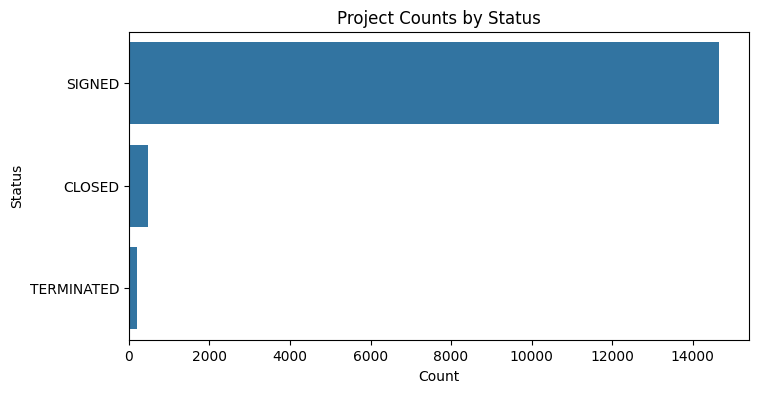

In [110]:
project_merged["status"].value_counts()
project_merged["status"].value_counts(normalize=True).round(3) * 100

plt.figure(figsize=(8, 4))
sns.countplot(data=project_merged, y="status", order=project_merged["status"].value_counts().index)
plt.title("Project Counts by Status")
plt.xlabel("Count")
plt.ylabel("Status")
plt.show()


#### Total Cost

In [111]:
zero_pct = (project_merged["totalCost"] == 0).sum()/len(project_merged)*100
print(f"Percentage of zero-cost projects: {zero_pct:.2f}%")


Percentage of zero-cost projects: 42.79%


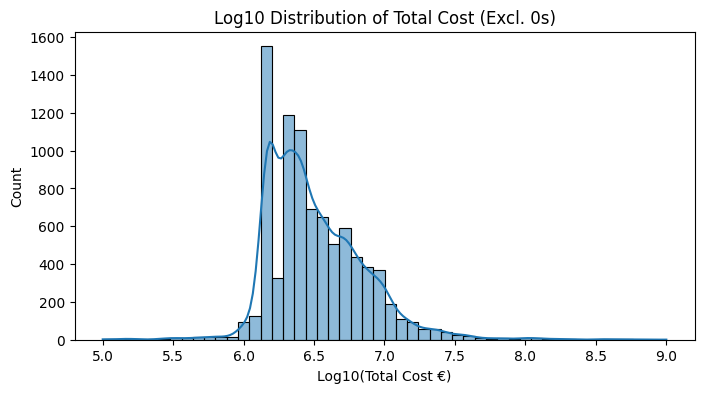

In [112]:

# Filter out zero-cost projects
project_nonzero = project_merged[project_merged["totalCost"] > 0]

plt.figure(figsize=(8, 4))
sns.histplot(np.log10(project_nonzero["totalCost"]), bins=50, kde=True)
plt.title("Log10 Distribution of Total Cost (Excl. 0s)")
plt.xlabel("Log10(Total Cost €)")
plt.show()





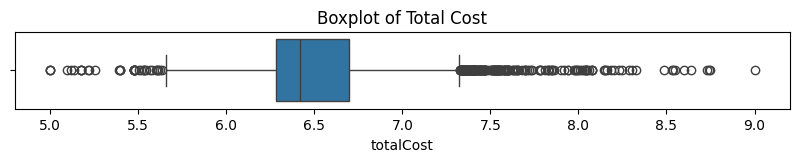

In [113]:
plt.figure(figsize=(10, 1))
sns.boxplot(x=np.log10(project_nonzero["totalCost"]))
plt.title("Boxplot of Total Cost")
plt.show()


Average Cost per Particpant & Average Annual Cost per Participant

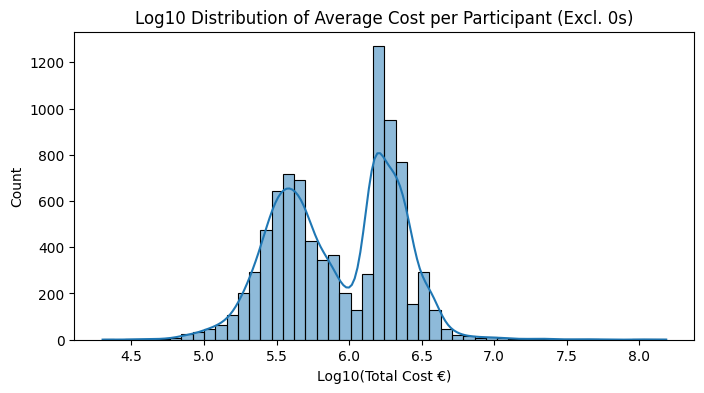

In [114]:
plt.figure(figsize=(8, 4))
sns.histplot(np.log10(project_nonzero["avg_funding_per_participant"]), bins=50, kde=True)
plt.title("Log10 Distribution of Average Cost per Participant (Excl. 0s)")
plt.xlabel("Log10(Total Cost €)")
plt.show()


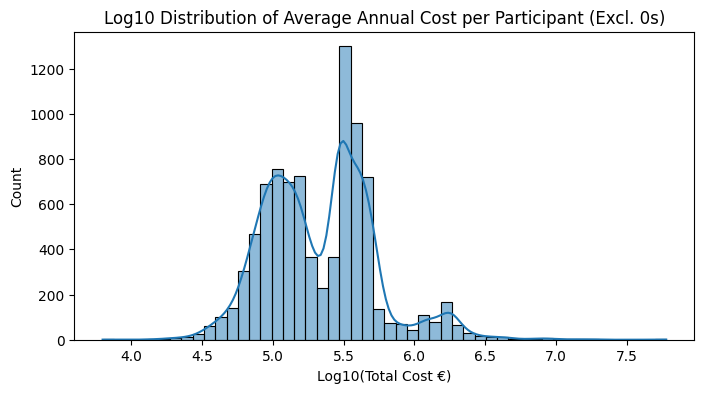

In [115]:
plt.figure(figsize=(8, 4))
sns.histplot(np.log10(project_nonzero["avg_annual_funding_per_participant"]), bins=50, kde=True)
plt.title("Log10 Distribution of Average Annual Cost per Participant (Excl. 0s)")
plt.xlabel("Log10(Total Cost €)")
plt.show()


#### Start Dates

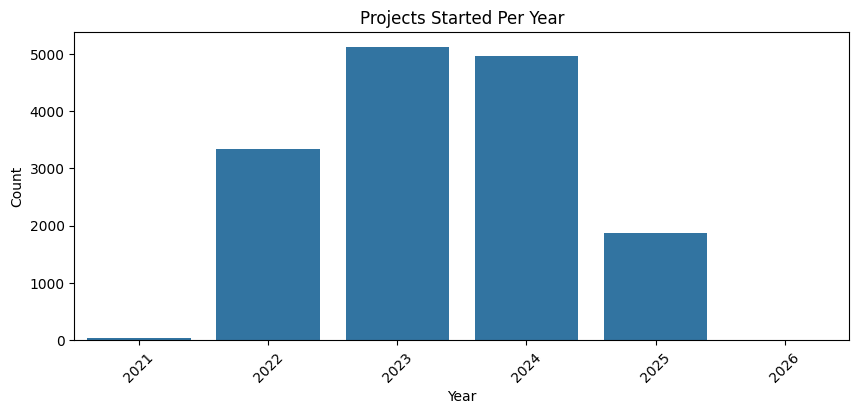

In [116]:
project_merged["startYear"] = project_merged["startDate"].dt.year

plt.figure(figsize=(10, 4))
sns.countplot(data=project_merged, x="startYear", order=sorted(project_merged["startYear"].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Projects Started Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


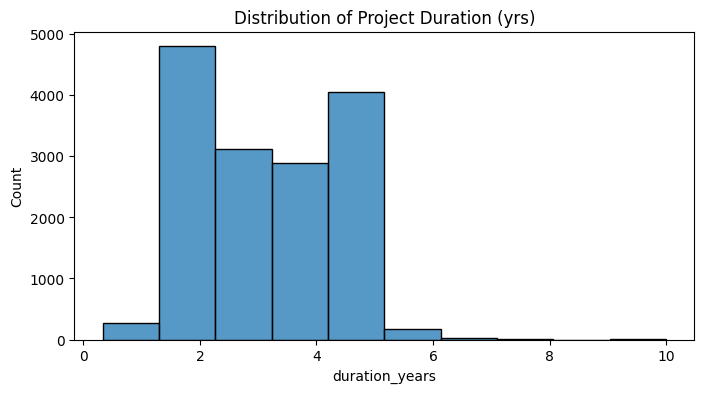

In [117]:
plt.figure(figsize=(8, 4))
sns.histplot((project_merged["duration_years"]), bins=10)
plt.title("Distribution of Project Duration (yrs)")
plt.show()


#### Number of Organisations per Project

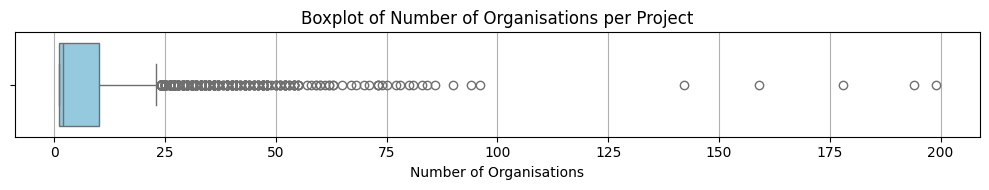

In [118]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=project_merged["n_organisations"], color="skyblue")

plt.title("Boxplot of Number of Organisations per Project")
plt.xlabel("Number of Organisations")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


a few very large collaborations (EU priority projects?), but ~50% <= 3 and the rest <=24

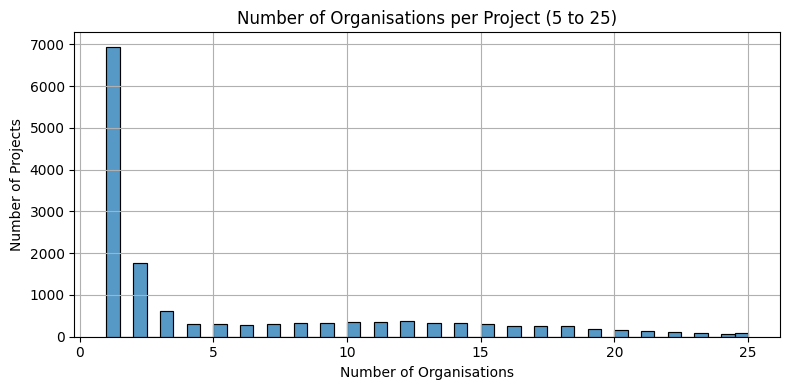

In [119]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=project_merged[project_merged["n_organisations"] <= 25],
    x="n_organisations",
    bins=48
)

plt.title("Number of Organisations per Project (5 to 25)")
plt.xlabel("Number of Organisations")
plt.ylabel("Number of Projects")
plt.grid(True)
plt.tight_layout()
plt.show()


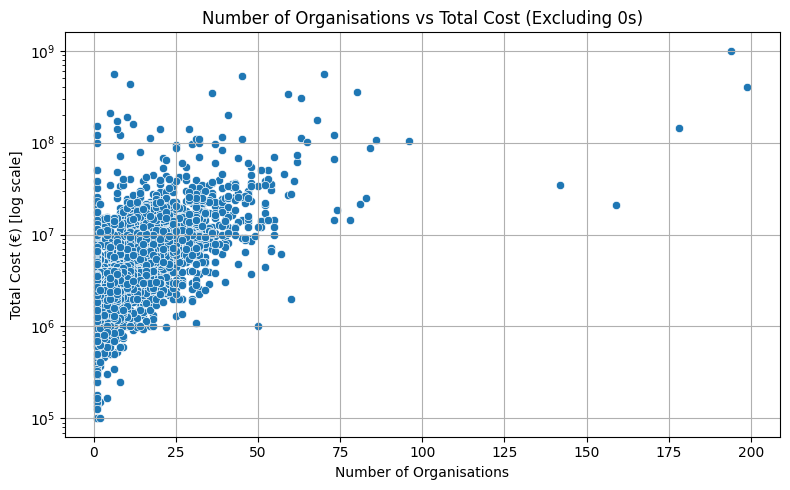

In [120]:
plt.figure(figsize=(8, 5))
subset = project_merged[project_merged["totalCost"] > 0]

sns.scatterplot(data=subset, x="n_organisations", y="totalCost")

plt.yscale("log")
plt.ylabel("Total Cost (€) [log scale]")

plt.title("Number of Organisations vs Total Cost (Excluding 0s)")
plt.xlabel("Number of Organisations")
plt.grid(True)
plt.tight_layout()
plt.show()


## Vectorise Text: testing

### First attempt- combining objective and sciVoc topics to predict similar projects

In [27]:
objective_texts = project_merged["title"].fillna("") + " "+project_merged["objective"].fillna("") + " " + project_merged["sciVocTopics"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")


In [29]:

model = SentenceTransformer('all-MiniLM-L6-v2')
project_vectors = model.encode(objective_texts, show_progress_bar=True)


Batches:   0%|          | 0/480 [00:00<?, ?it/s]

In [32]:
user_input = "war in the balkans"
input_vec = model.encode([user_input])  # or vectorizer.transform([user_input])

sims = cosine_similarity(input_vec, project_vectors)[0]
project["similarity"] = sims

top_matches = project.sort_values("similarity", ascending=False).head(10)


In [33]:
top_matches

,projectID,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi,similarity
8504,101077076,MACAUTH,SIGNED,"Screening Souls, Building Nations. Macedonia(s...",2023-03-01,2028-02-29,1467800.0,1467800.00,HORIZON.1.1,ERC-2022-STG,...,HORIZON,ERC-2022-STG,ERC-2022-STG,HORIZON-ERC,NaN,The project aims to investigate a little-explo...,2023-02-24 16:40:29,244669,10.3030/101077076,0.524238
8808,101054647,CivilWars,SIGNED,"The Age of Civil Wars in Europe, c. 1914-1949",2022-09-01,2027-08-31,2499940.0,2499940.00,HORIZON.1.1,ERC-2021-ADG,...,HORIZON,ERC-2021-ADG,ERC-2021-ADG,HORIZON-AG,NaN,"In the first half of the twentieth century, Eu...",2022-08-17 19:38:06,239893,10.3030/101054647,0.498318
10648,101106810,Expertise,SIGNED,Serving the revolution: educational networks i...,2024-06-01,2026-05-31,0.0,173847.36,HORIZON.1.2,HORIZON-MSCA-2022-PF-01-01,...,HORIZON,HORIZON-MSCA-2022-PF-01,HORIZON-MSCA-2022-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,My research explores the educational networks ...,2023-07-24 11:33:34,254604,10.3030/101106810,0.489106
4161,101149179,Power and the Past,SIGNED,Power and the Past: European Empires and Archa...,2024-10-01,2026-09-30,0.0,199440.96,HORIZON.1.2,HORIZON-MSCA-2023-PF-01-01,...,HORIZON,HORIZON-MSCA-2023-PF-01,HORIZON-MSCA-2023-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,"""This project compares the archaeological rese...",2024-04-29 11:34:30,263027,10.3030/101149179,0.488710
5018,101063876,camPEconomies,SIGNED,Political Economies of Refugee Camps,2023-09-01,2025-08-31,0.0,173847.36,HORIZON.1.2,HORIZON-MSCA-2021-PF-01-01,...,HORIZON,HORIZON-MSCA-2021-PF-01,HORIZON-MSCA-2021-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,The camPEconomies project explores a crucial a...,2022-08-26 15:30:12,240252,10.3030/101063876,0.486182
2350,101132692,GEO-POWER-EU,SIGNED,Empowering the Geopolitical EU in the Eastern ...,2024-06-01,2027-05-31,2999980.0,2999980.00,HORIZON.2.2,HORIZON-CL2-2023-DEMOCRACY-01-08,...,HORIZON,HORIZON-CL2-2023-DEMOCRACY-01,HORIZON-CL2-2023-DEMOCRACY-01,HORIZON-RIA,NaN,GEO-POWER-EU's main objective is to contribute...,2024-05-17 09:57:34,263470,10.3030/101132692,0.459974
8262,101054963,OPEN BORDERS,SIGNED,Cold War Europe Beyond Borders. A Transnationa...,2023-01-01,2027-12-31,2474330.0,2474330.00,HORIZON.1.1,ERC-2021-ADG,...,HORIZON,ERC-2021-ADG,ERC-2021-ADG,HORIZON-AG,NaN,"""This project aims to rethink the history of C...",2022-08-02 16:57:16,238852,10.3030/101054963,0.458768
6453,101054428,TheGAME,SIGNED,The Game: Counter-mapping informal refugee mob...,2022-11-01,2027-10-31,2473760.0,2473760.00,HORIZON.1.1,ERC-2021-ADG,...,HORIZON,ERC-2021-ADG,ERC-2021-ADG,ERC,NaN,The Balkan Route is the most important overlan...,2022-10-10 13:50:16,242402,10.3030/101054428,0.443885
4632,101149227,FESTWAR FM,SIGNED,Film Festivals and War: A Fe-Male Perspective ...,2025-02-01,2028-01-31,0.0,280202.88,HORIZON.1.2,HORIZON-MSCA-2023-PF-01-01,...,HORIZON,HORIZON-MSCA-2023-PF-01,HORIZON-MSCA-2023-PF-01,HORIZON-TMA-MSCA-PF-GF,NaN,A transdisciplinary project traversing cultura...,2024-04-16 18:34:51,262556,10.3030/101149227,0.436191
8532,101089123,STONE,SIGNED,Unde venis? Unraveling the enigma of stećci to...,2024-05-01,2029-04-30,2778380.0,2778380.00,HORIZON.1.1,ERC-2022-COG,...,HORIZON,ERC-2022-COG,ERC-2022-COG,HORIZON-ERC,NaN,Stećci are medieval tombstones dispersed throu...,2024-01-10 16:26:24,257734,10.3030/101089123,0.434567


## Save Processed data to csv

In [159]:
project_merged.to_csv("../data_1/processed/project_merged.csv", index=False)


In [160]:
org_unique_detailed.to_csv("../data_1/processed/org_unique_detailed.csv", index=False)


In [161]:
scivoc_summary.to_csv("../data_1/processed/scivoc_summary.csv", index=False)


## Create model files (vectorise project objectives for searching later)

In [94]:
model = SentenceTransformer("all-MiniLM-L6-v2")

objective_texts = project_merged["title"].fillna("") + " "+project_merged["objective"].fillna("") + " " + project_merged["sciVocTopics"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")

project_embeddings = model.encode(objective_texts, show_progress_bar=True)

# Save embeddings
np.save("../models/project_embeddings.npy", project_embeddings)

# Save project IDs for later lookup
project_ids = project_merged["projectID"].tolist()
with open("../models/project_ids.pkl", "wb") as f:
    pickle.dump(project_ids, f)

# Save the model path
with open("../models/embedding_model_name.txt", "w") as f:
    f.write("all-MiniLM-L6-v2")


Batches:   0%|          | 0/480 [00:00<?, ?it/s]